# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [9]:
df = pd.read_csv('SP.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

R-squared: 0.03
Mean Squared Error (MSE): 0.87
Root Mean Squared Error (RMSE): 0.93


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


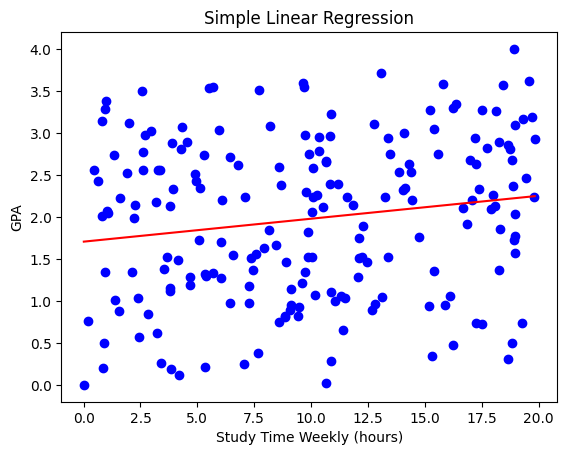

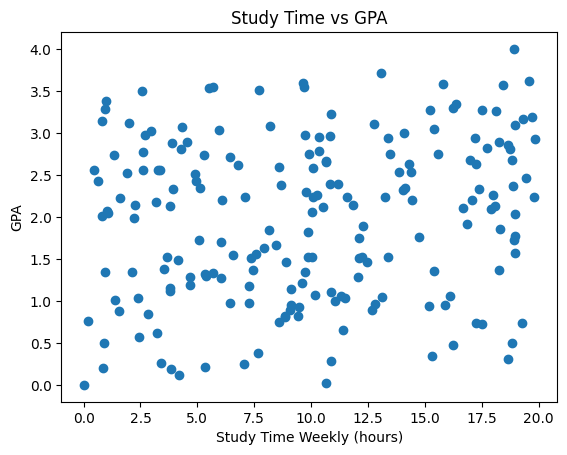

Correlation coefficient: 0.17


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X, y)

# Predict on the training data
y_pred = model.predict(X)

# Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5

print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Plotting the original data points
plt.scatter(X, y, color='blue')

# Plotting the Simple Linear Regression line
X_plot = np.linspace(min(X['StudyTimeWeekly']), max(X['StudyTimeWeekly']), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)

plt.plot(X_plot, y_plot, color='red')
plt.xlabel('Study Time Weekly (hours)')
plt.ylabel('GPA')
plt.title('Simple Linear Regression')
plt.show()
# Scatter plot to visualize the relationship
plt.scatter(df['StudyTimeWeekly'], df['GPA'])
plt.xlabel('Study Time Weekly (hours)')
plt.ylabel('GPA')
plt.title('Study Time vs GPA')
plt.show()

# Checking the correlation
correlation = df['StudyTimeWeekly'].corr(df['GPA'])
print(f'Correlation coefficient: {correlation:.2f}')


The correlation coefficient measures the strength and direction of a linear relationship between two variables. In the context of your data, a correlation coefficient of 0.17 indicates a weak positive linear relationship between StudyTimeWeekly and GPA.

##Polynomial regression

R-squared: 0.07
Mean Squared Error (MSE): 0.83
Root Mean Squared Error (RMSE): 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


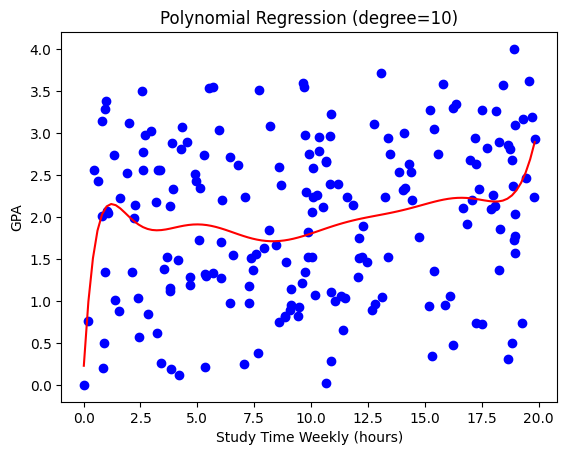

In [16]:
# Create polynomial features
from sklearn.preprocessing import PolynomialFeatures

degree = 10  # Change this to 3, 4, etc. for higher-degree polynomials
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict on the training data
y_pred = model.predict(X_poly)

# Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5

print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Plotting the original data points
plt.scatter(X, y, color='blue')

# Plotting the polynomial regression curve
X_plot = np.linspace(min(X['StudyTimeWeekly']), max(X['StudyTimeWeekly']), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.plot(X_plot, y_plot, color='red')
plt.xlabel('Study Time Weekly (hours)')
plt.ylabel('GPA')
plt.title(f'Polynomial Regression (degree={degree})')
plt.show()

##Support Vector Regression

R-squared: 0.02
Mean Squared Error (MSE): 0.87
Root Mean Squared Error (RMSE): 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


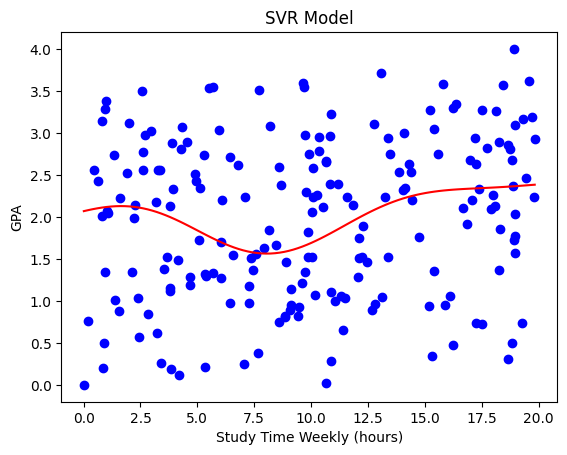

In [19]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()  # y is reshaped to 2D before scaling

# Fit the SVR model
from sklearn.svm import SVR
model = SVR(kernel='rbf')
model.fit(X_scaled, y_scaled)

# Predict on the training data
y_pred_scaled = model.predict(X_scaled)
# Reshape y_pred_scaled to a 2D array before inverse transforming
y_pred_scaled_2d = y_pred_scaled.reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled_2d).flatten() # Flatten the result to get a 1D array

# Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5

print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Plotting the original data points
plt.scatter(X, y, color='blue')

# Plotting the SVR regression curve
X_plot = np.linspace(min(X['StudyTimeWeekly']), max(X['StudyTimeWeekly']), 100).reshape(-1, 1)
X_plot_scaled = scaler_X.transform(X_plot)
y_plot_scaled = model.predict(X_plot_scaled)
y_plot = scaler_y.inverse_transform(y_plot_scaled.reshape(-1, 1)) # Reshape before inverse transform

plt.plot(X_plot, y_plot, color='red')
plt.xlabel('Study Time Weekly (hours)')
plt.ylabel('GPA')
plt.title('SVR Model')
plt.show()

##Decision Tree Regression

R-squared: 1.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


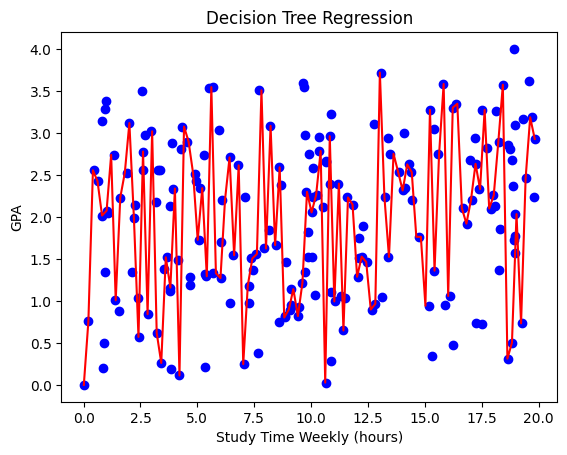

In [20]:
# Fit the Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(X, y)

# Predict on the training data
y_pred = model.predict(X)

# Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5

print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Plotting the original data points
plt.scatter(X, y, color='blue')

# Plotting the decision tree regression curve
X_plot = np.linspace(min(X['StudyTimeWeekly']), max(X['StudyTimeWeekly']), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)

plt.plot(X_plot, y_plot, color='red')
plt.xlabel('Study Time Weekly (hours)')
plt.ylabel('GPA')
plt.title('Decision Tree Regression')
plt.show()

##Random Forest Regression

R-squared: 0.77
Mean Squared Error (MSE): 0.21
Root Mean Squared Error (RMSE): 0.45


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


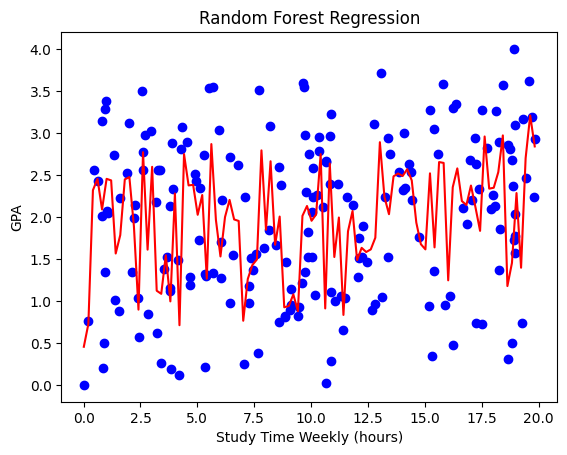

In [25]:
# Fit the Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

# Predict on the training data
y_pred = model.predict(X)

# Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5

print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Plotting the original data points
plt.scatter(X, y, color='blue')

# Plotting the Random Forest Regression curve
X_plot = np.linspace(min(X['StudyTimeWeekly']), max(X['StudyTimeWeekly']), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)

plt.plot(X_plot, y_plot, color='red')
plt.xlabel('Study Time Weekly (hours)')
plt.ylabel('GPA')
plt.title('Random Forest Regression')
plt.show()